In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

33.40175745900015 17.888645232344714
-37.649118629313975 -13.055681826247039
14.00358128664547 -71.99481032721086
-39.23606505880879 83.18365756698768
8.85577193970282 -69.03752335664842
80.75586253016388 6.020322345472181
25.93120205349912 8.812989232375273
-66.34697849386659 -51.72671943376934
-82.81119820837678 -8.784515836973242
-41.54161819719823 -67.10901717051247
-76.58704705110537 51.109841304122284
72.7252195147093 74.66627864012804
-68.85722552308565 -43.466626612853844
87.48825469981324 56.93413326953328
37.82985240883542 10.739389797100088
-24.587531499328236 -36.66450893946208
27.235469779463955 86.03080008610411
-55.290945588512336 -14.70781821416567
-34.72937317597246 39.49287610103232
71.26354313174744 -10.959037505792821
-24.04449406208225 -48.43054722419824
21.844427573552238 -82.93004703117467
11.489411668464186 88.63876575889327
-12.203850608106862 -12.29858529201617
3.9498113768490413 -37.581300075057996
-57.09540035345283 67.054646206104
17.331332326299275 41.8791

-34.53036992740044 -19.42811029540823
-73.22976074938123 -60.54519381532399
-9.274051757558937 -14.404794998768097
11.759910131822508 -54.37410156699344
-25.673810750058536 82.67794817254546
-45.78136885851871 36.77503976155374
63.913717126549415 77.51049107397313
37.74328762335796 28.96297945536972
-30.73603898299217 20.50871888221917
82.69866104960954 76.92714085183411
-75.57899081802917 -58.81883500442868
36.51944634070591 -87.06042464512511
26.21943002155855 -41.98347599325711
47.20886468453466 -11.127982877556462
2.241802847731549 -23.82225062607837
40.703045881029595 9.953286077571562
-30.486252962951205 -56.65787153303381
-2.937695071407404 -36.44474742372697
-69.95873298454985 -29.13032666192094
-31.142596741266722 -23.964077030007516
-52.00162183997399 -45.32176318292662
15.180469306975382 -85.9375435371829
89.33225996957754 27.30502888013966
-76.10313343272625 8.490902040308299
46.1790313479691 -87.53544907813306
43.303469046048235 29.18929095965386
41.943448385462546 68.8328

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | benghazi
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | manaure
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | villa bruzual
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | puerto madryn
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | rafraf
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | janakpur
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | richards bay
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | capao bonito
Processing Record 21 of Set 1 | nueva gerona
Processing Record 22 of Set 1 | port blair
Processing Re

Processing Record 40 of Set 4 | novo aripuana
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | glencoe
Processing Record 43 of Set 4 | sarahan
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | shakiso
Processing Record 46 of Set 4 | riorges
Processing Record 47 of Set 4 | najran
Processing Record 48 of Set 4 | burica
City not found. Skipping...
Processing Record 49 of Set 4 | carutapera
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | balestrand
Processing Record 3 of Set 5 | tubinskiy
Processing Record 4 of Set 5 | maun
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | mocuba
Processing Record 7 of Set 5 | castro
Processing Record 8 of Set 5 | ravar
Processing Record 9 of Set 5 | conceicao das alagoas
Processing Record 10 of Set 5 | kargasok
Processing Record 11 of Set 5 | klaksvik
Processing Record 12 of Set 5 | krasnoselkup
Processing R

Processing Record 33 of Set 8 | calbe
Processing Record 34 of Set 8 | nikolsk
Processing Record 35 of Set 8 | bereznik
Processing Record 36 of Set 8 | ginda
Processing Record 37 of Set 8 | talnakh
Processing Record 38 of Set 8 | sistranda
Processing Record 39 of Set 8 | nhamunda
Processing Record 40 of Set 8 | awjilah
Processing Record 41 of Set 8 | gryazi
Processing Record 42 of Set 8 | salinas
Processing Record 43 of Set 8 | peruibe
Processing Record 44 of Set 8 | balkanabat
Processing Record 45 of Set 8 | aksarayskiy
Processing Record 46 of Set 8 | rio claro
Processing Record 47 of Set 8 | belmonte
Processing Record 48 of Set 8 | taywarah
Processing Record 49 of Set 8 | pontal do parana
Processing Record 50 of Set 8 | urumqi
Processing Record 1 of Set 9 | adrar
Processing Record 2 of Set 9 | romny
Processing Record 3 of Set 9 | jalu
Processing Record 4 of Set 9 | chilca
Processing Record 5 of Set 9 | comodoro rivadavia
Processing Record 6 of Set 9 | tucurui
Processing Record 7 of Se

Processing Record 23 of Set 12 | shelburne
Processing Record 24 of Set 12 | tosya
Processing Record 25 of Set 12 | koulamoutou
Processing Record 26 of Set 12 | boralday
Processing Record 27 of Set 12 | ventanas
Processing Record 28 of Set 12 | santa maria
Processing Record 29 of Set 12 | khipro
Processing Record 30 of Set 12 | azimur
City not found. Skipping...
Processing Record 31 of Set 12 | ajaccio
Processing Record 32 of Set 12 | sovetskiy
Processing Record 33 of Set 12 | valtice
Processing Record 34 of Set 12 | tome
Processing Record 35 of Set 12 | los andes
Processing Record 36 of Set 12 | santa cruz de la palma
Processing Record 37 of Set 12 | abu zabad
Processing Record 38 of Set 12 | paamiut
Processing Record 39 of Set 12 | kuche
City not found. Skipping...
Processing Record 40 of Set 12 | soria
Processing Record 41 of Set 12 | fortaleza
Processing Record 42 of Set 12 | silivainiotika
City not found. Skipping...
Processing Record 43 of Set 12 | opava
Processing Record 44 of Se

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Benghazi,32.12,20.07,68.05,64,68,14.43,LY,2020-04-15 14:53:19
1,Jamestown,42.10,-79.24,36.00,61,75,12.75,US,2020-04-15 14:53:19
2,Manaure,11.78,-72.44,87.80,55,20,12.75,CO,2020-04-15 14:53:19
3,Bambous Virieux,-20.34,57.76,78.80,78,75,13.87,MU,2020-04-15 14:53:19
4,Villa Bruzual,9.33,-69.12,93.07,32,0,4.16,VE,2020-04-15 14:53:20
5,Gat,31.61,34.76,75.20,53,71,6.93,IL,2020-04-15 14:49:46
6,Ushuaia,-54.80,-68.30,44.60,81,40,5.55,AR,2020-04-15 14:53:20
7,Hermanus,-34.42,19.23,66.00,77,100,5.86,ZA,2020-04-15 14:53:20
8,Puerto Madryn,-42.77,-65.04,74.05,20,78,21.52,AR,2020-04-15 14:53:20
9,Port Alfred,-33.59,26.89,66.00,90,65,1.99,ZA,2020-04-15 14:53:20


In [13]:
new_column_order = ["City","Country","Date","Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Benghazi,LY,2020-04-15 14:53:19,32.12,68.05,64,68,14.43
1,Jamestown,US,2020-04-15 14:53:19,42.10,36.00,61,75,12.75
2,Manaure,CO,2020-04-15 14:53:19,11.78,87.80,55,20,12.75
3,Bambous Virieux,MU,2020-04-15 14:53:19,-20.34,78.80,78,75,13.87
4,Villa Bruzual,VE,2020-04-15 14:53:20,9.33,93.07,32,0,4.16
...,...,...,...,...,...,...,...,...
586,Veinticinco De Mayo,AR,2020-04-15 14:54:20,-35.43,63.30,41,0,8.14
587,Sinjar,IQ,2020-04-15 14:54:20,36.32,68.97,34,22,6.91
588,Liverpool,GB,2020-04-15 14:52:04,53.41,66.99,48,87,4.70
589,Sarny,UA,2020-04-15 14:54:20,51.34,41.05,83,100,18.12


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Retrieve the data we need to create our scatter plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time

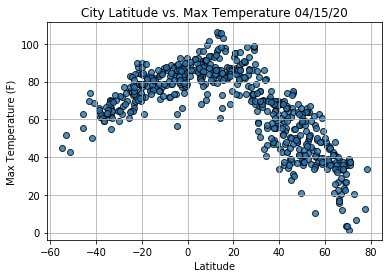

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

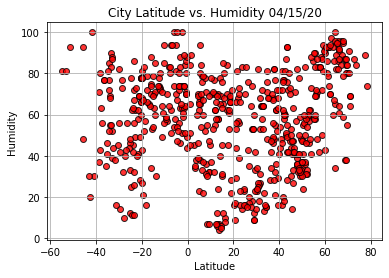

In [26]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths=1,
            color="red",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

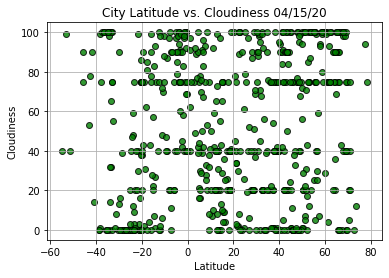

In [28]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths=1,
            color="green",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

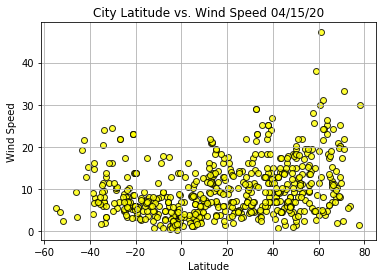

In [29]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths=1,
            color="yellow",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()